In [10]:
import stemgraphic

(<Figure size 750x250 with 1 Axes>,
 <Axes: title={'center': 'Stem-and-Leaf Plot Example'}>)

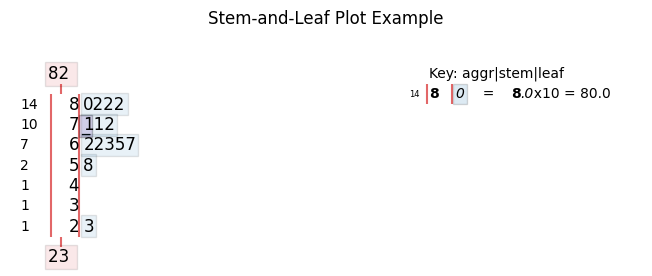

In [24]:
data = [23, 58, 62, 62, 63 ,65 ,67,71,71,72,80,82,82,82]

stemgraphic.stem_graphic(data, scale=10, title="Stem-and-Leaf Plot Example")

(<Figure size 750x100 with 1 Axes>,
 <Axes: title={'center': 'Stem-and-Leaf Plot Example'}>)

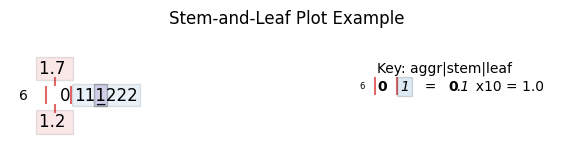

In [28]:
data = [1.2,1.3,1.4,1.5,1.6,1.7]

stemgraphic.stem_graphic(data, scale=10, title="Stem-and-Leaf Plot Example")

In [4]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [2]:
dataset = [28, 32, 45, 37, 41, 33, 25, 29, 40, 38, 36, 44]

In [3]:
dataset

[28, 32, 45, 37, 41, 33, 25, 29, 40, 38, 36, 44]

# Discrete Frequency Table

In [5]:
freq_table = pd.Series(dataset).value_counts().sort_index()
print(freq_table)

25    1
28    1
29    1
32    1
33    1
36    1
37    1
38    1
40    1
41    1
44    1
45    1
Name: count, dtype: int64


# Continuous Frequency Table

In [16]:
bins = [25, 30, 35, 40, 45, 50]
labels = ["25-30", "30-35", "35-40", "40-45", "45-50"]
freq_table_continuous = pd.cut(dataset, bins=bins, labels=labels, right=False).value_counts().sort_index()
print(freq_table_continuous)

25-30    3
30-35    2
35-40    3
40-45    3
45-50    1
Name: count, dtype: int64


# Stem & Leaf

(<Figure size 750x150 with 1 Axes>,
 <Axes: title={'center': 'Stem-and-Leaf Plot Example'}>)

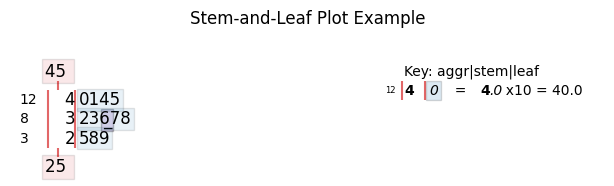

In [14]:
stemgraphic.stem_graphic(dataset, scale=10, title="Stem-and-Leaf Plot Example")

# Histogram

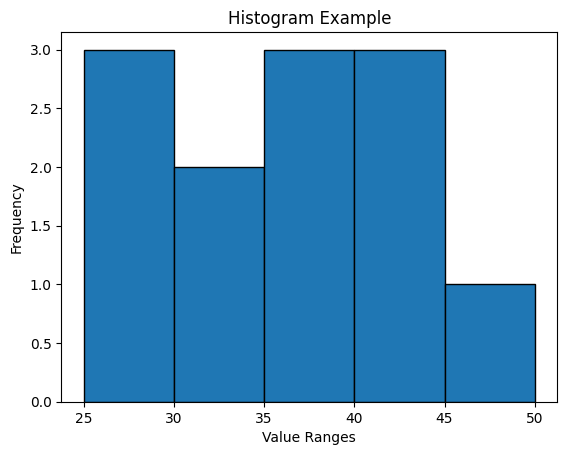

In [18]:
plt.hist(dataset, bins=bins, edgecolor='black')
plt.title('Histogram Example')
plt.xlabel('Value Ranges')
plt.ylabel('Frequency')
plt.show()

# Frequency Polygon

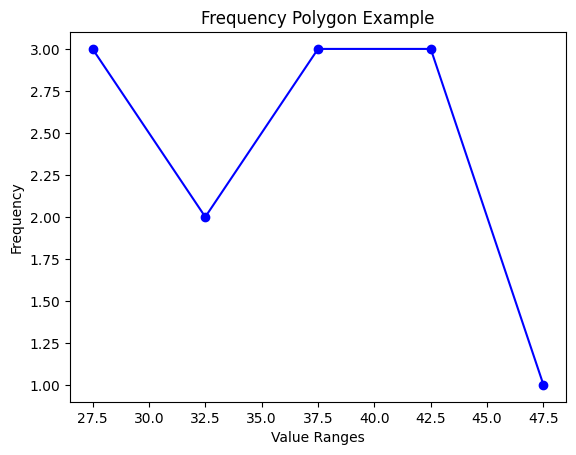

In [21]:
midpoints = [(bins[i] + bins[i+1]) / 2 for i in range(len(bins)-1)]
frequencies = freq_table_continuous.values
plt.plot(midpoints, frequencies, marker='o', linestyle='-', color='blue')
plt.title('Frequency Polygon Example')
plt.xlabel('Value Ranges')
plt.ylabel('Frequency')
plt.show()

# Frequency Curve

In [22]:
from scipy.interpolate import make_interp_spline

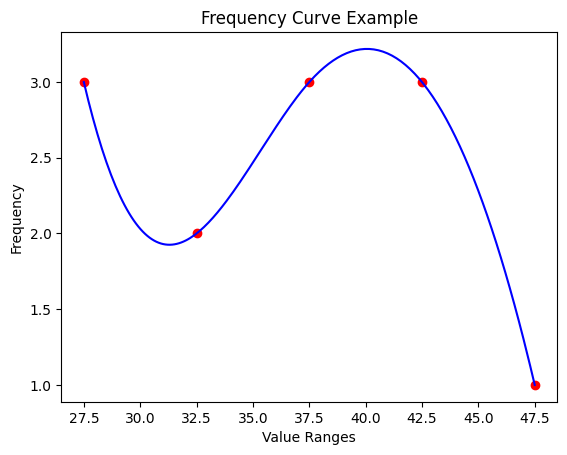

In [23]:
x = np.array(midpoints)
y = np.array(frequencies)   

x_ = np.linspace(x.min(), x.max(), 200)
y_ = make_interp_spline(x, y)(x_)

plt.plot(x_, y_, color='blue')
plt.scatter(x, y, color='red')
plt.title('Frequency Curve Example')
plt.xlabel('Value Ranges')
plt.ylabel('Frequency')
plt.show()

# Ogive Curve

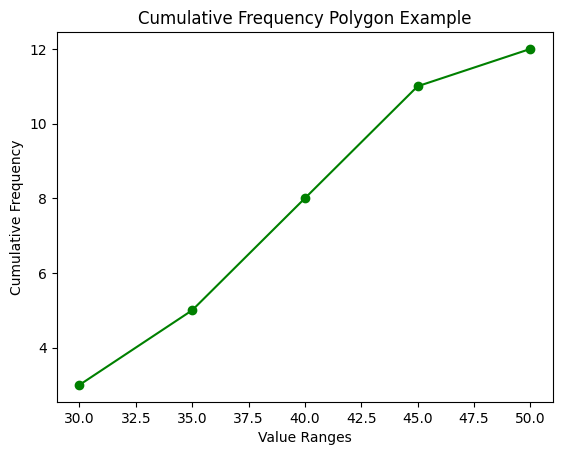

In [29]:
cum_freq = np.cumsum(frequencies)
upper_bounds = [bins[i+1] for i in range(len(bins)-1)]
plt.plot(upper_bounds, cum_freq, marker='o', linestyle='-', color='green')
plt.title('Cumulative Frequency Polygon Example')
plt.xlabel('Value Ranges')
plt.ylabel('Cumulative Frequency')
plt.show()

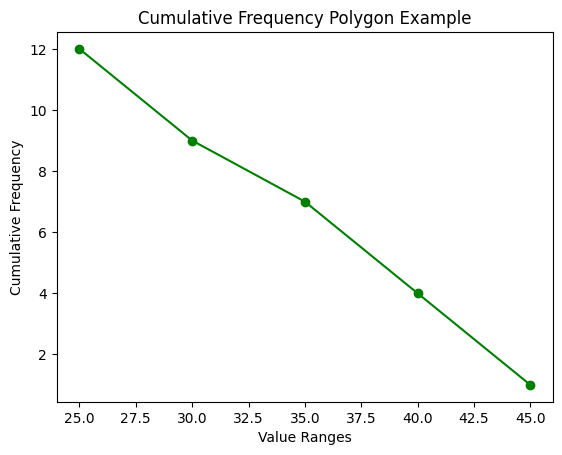

In [32]:
ttl = sum(frequencies)
more_than_cum = [ttl - sum(frequencies[:i]) for i in range(len(frequencies))]
lower_bounds = bins[:-1]
plt.plot(lower_bounds, more_than_cum, marker='o', linestyle='-', color='green')
plt.title('Cumulative Frequency Polygon Example')
plt.xlabel('Value Ranges')
plt.ylabel('Cumulative Frequency')
plt.show()

# Pie Chart

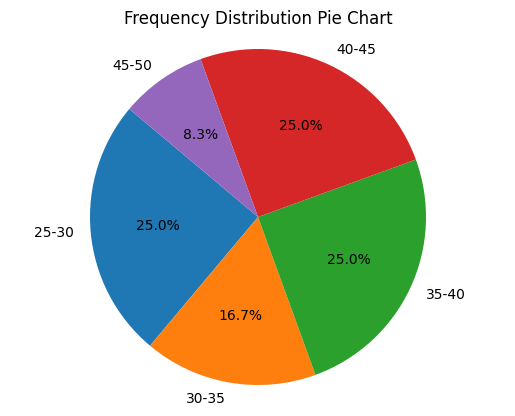

In [ ]:
plt.pie(frequencies, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Frequency Distribution Pie Chart')
plt.axis('equal')  
plt.show()  

In [40]:
from math import prod
from scipy import stats

In [36]:
data = [4, 7, 5, 10, 15, 8, 6, 12, 20, 9, 7, 11, 18, 25, 13]

In [38]:
mean = np.mean(data)
print(mean)

11.333333333333334


In [42]:
geo_mean = stats.gmean(data)
print(geo_mean)

9.987053851018777


In [43]:
harmonic_mean = stats.hmean(data)
print(harmonic_mean)

8.813783509057878


In [44]:
median = np.median(data)
print(median)

10.0


In [46]:
mode = stats.mode(data, keepdims=True).mode[0]
print(mode)

7


In [47]:
bins = [0, 5, 10, 15, 20, 25, 30]
labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30']

In [52]:
grouped = pd.cut(data, bins=bins, labels=labels, right=False)
freq_table = grouped.value_counts().sort_index()
print(freq_table)

0-5      1
5-10     6
10-15    4
15-20    2
20-25    1
25-30    1
Name: count, dtype: int64


In [62]:
midpoints = [int((bins[i] + bins[i + 1]) / 2) for i in range(len(bins) - 1)]
print(midpoints)
x = midpoints
f = freq_table.values
N = f.sum()

[2, 7, 12, 17, 22, 27]


In [57]:
arithmetic_mean = np.sum(f*x) / np.sum(f)
print(arithmetic_mean)

11.666666666666666


In [59]:
geometric_mean = prod(x ** f) ** (1 / len(data))
print(geometric_mean)

9.882538172012897


In [61]:
harmonic_mean = len(data) / np.sum(f / x)
print(harmonic_mean)

7.933926967973661


In [71]:
cum_freq = np.cumsum(f)
n2 = N / 2
median_class_idx = np.where(cum_freq >= n2)[0][0]
L = bins[median_class_idx]
CF = cum_freq[median_class_idx]
fm = f[median_class_idx]
h = bins[1] - bins[0]

median = L + (n2 - CF) * h / fm
print(median)

5.625


In [73]:
modal_class_idx = np.argmax(f)
L = bins[modal_class_idx]
f1 = f[modal_class_idx]
f0 = f[modal_class_idx - 1] if modal_class_idx > 0 else 0
f2 = f[modal_class_idx + 1] if modal_class_idx < len(f) - 1 else 0
del1 = f1 - f0
del2 = f1 - f2
mode_ = L + (del1 / (del1 + del2)) * h
print(mode_)

8.571428571428571


In [74]:
import numpy as np
import pandas as pd

# Dataset
data = np.array([52, 68, 75, 60, 90, 85, 73, 64, 58, 79, 95, 88, 70, 66])
n = len(data)

# --- Basic stats ---
mean = np.mean(data)
median = np.median(data)
Q1 = np.percentile(data, 25)   # first quartile
Q3 = np.percentile(data, 75)   # third quartile
IQR = Q3 - Q1

# --- Absolute measures of dispersion ---
# Range
data_range = np.max(data) - np.min(data)

# Mean Deviation about Mean (MAD)
mad = np.mean(np.abs(data - mean))

# Standard Deviation
std_pop = np.std(data, ddof=0)   # population
std_samp = np.std(data, ddof=1)  # sample

# Quartile Deviation
QD = IQR / 2

# --- Relative measures of dispersion ---
coeff_range = data_range / (np.max(data) + np.min(data))
coeff_mad = mad / mean
cv = (std_pop / mean) * 100   # Coefficient of Variation (percentage)
coeff_QD = (Q3 - Q1) / (Q3 + Q1)

# --- Results ---
print("Dataset:", data.tolist())
print("\nAbsolute Measures:")
print("Range:", data_range)
print("Mean Deviation (about mean):", mad)
print("Standard Deviation (Population):", std_pop)
print("Standard Deviation (Sample):", std_samp)
print("Quartile Deviation:", QD)

print("\nRelative Measures:")
print("Coefficient of Range:", coeff_range)
print("Coefficient of Mean Deviation:", coeff_mad)
print("Coefficient of Variation (%):", cv)
print("Coefficient of Quartile Deviation:", coeff_QD)


Dataset: [52, 68, 75, 60, 90, 85, 73, 64, 58, 79, 95, 88, 70, 66]

Absolute Measures:
Range: 43
Mean Deviation (about mean): 10.51020408163265
Standard Deviation (Population): 12.481210367784769
Standard Deviation (Sample): 12.952364118713476
Quartile Deviation: 9.5

Relative Measures:
Coefficient of Range: 0.2925170068027211
Coefficient of Mean Deviation: 0.14383465996369219
Coefficient of Variation (%): 17.08083530293126
Coefficient of Quartile Deviation: 0.12837837837837837
